In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('../../dsc-phase-2-project-v2-3/data/kc_house_data.csv')

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Cleaning data

In [6]:
df = df.dropna()
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.576200e+04,1.576200e+04,15762.000000,15762.000000,15762.000000,1.576200e+04,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000,15762.000000
mean,4.593364e+09,5.413172e+05,3.378949,2.120797,2084.512372,1.528082e+04,1.495147,1792.775473,1971.111217,82.440236,98077.558241,47.559177,-122.213520,1990.219579,12900.415556
std,2.876078e+09,3.722258e+05,0.935301,0.766772,918.617686,4.182288e+04,0.539352,828.403502,29.336823,397.212626,53.414906,0.138629,0.140706,684.142495,27977.230059
min,1.000102e+06,8.200000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.125159e+09,3.210000e+05,3.000000,1.750000,1430.000000,5.048500e+03,1.000000,1200.000000,1952.000000,0.000000,98033.000000,47.469200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.602000e+03,1.500000,1570.000000,1975.000000,0.000000,98065.000000,47.571000,-122.229000,1846.000000,7620.000000
75%,7.334501e+09,6.448750e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,2220.000000,1997.000000,0.000000,98117.000000,47.677400,-122.124000,2370.000000,10107.500000
max,9.895000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df = df.loc[df['bedrooms'] <= 6]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [9]:
df = df.loc[df['price'] <= 1000000]
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.467200e+04,14672.000000,14672.000000,14672.000000,14672.000000,1.467200e+04,14672.000000,14672.000000,14672.00000,14672.000000,14672.000000,14672.000000,14672.000000,14672.000000,14672.000000
mean,4.622641e+09,468171.367775,3.317612,2.040911,1956.200927,1.475352e+04,1.471647,1694.536396,1970.89163,71.536464,98078.129362,47.554850,-122.212643,1911.677890,12524.952631
std,2.877190e+09,196430.122071,0.858940,0.695125,750.892418,4.081908e+04,0.535382,709.476821,29.06256,371.006388,53.225087,0.141735,0.142598,599.195667,27050.449114
min,1.000102e+06,82000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.00000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.155375e+09,314000.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,1170.000000,1952.00000,0.000000,98033.000000,47.456400,-122.330000,1470.000000,5060.000000
50%,3.955900e+09,435000.000000,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,1510.000000,1975.00000,0.000000,98065.000000,47.565150,-122.231000,1800.000000,7532.000000
75%,7.349650e+09,592000.000000,4.000000,2.500000,2410.000000,1.025425e+04,2.000000,2080.000000,1996.00000,0.000000,98118.000000,47.679500,-122.121000,2260.000000,9875.000000
max,9.895000e+09,1000000.000000,6.000000,6.000000,7120.000000,1.651359e+06,3.500000,5710.000000,2015.00000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000


In [11]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [12]:
df['sqft_basement'].value_counts()

0.0       8952
?          313
500.0      151
600.0      146
700.0      138
          ... 
1281.0       1
602.0        1
1284.0       1
652.0        1
2040.0       1
Name: sqft_basement, Length: 247, dtype: int64

In [13]:
df = df.loc[df['sqft_basement'] != '?']
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [14]:
df['grade'].value_counts()

7 Average        6373
8 Good           4194
9 Better         1589
6 Low Average    1451
10 Very Good      506
5 Fair            161
11 Excellent       66
4 Low              16
12 Luxury           2
3 Poor              1
Name: grade, dtype: int64

In [15]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.435900e+04,14359.000000,14359.000000,14359.000000,14359.000000,1.435900e+04,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000
mean,4.621273e+09,468052.668779,3.317014,2.041403,1956.623790,1.476112e+04,1.470959,1694.979386,1970.889686,71.155025,98078.040114,47.554915,-122.212653,1911.798036,12481.189428
std,2.875686e+09,196562.825376,0.856583,0.695269,750.827983,4.099013e+04,0.534920,709.352851,29.024416,370.065282,53.263435,0.141886,0.142367,598.761135,26801.527710
min,1.000102e+06,82000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.155250e+09,313500.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,1170.000000,1952.000000,0.000000,98033.000000,47.456200,-122.330000,1470.000000,5060.000000
50%,3.955900e+09,435000.000000,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,1510.000000,1975.000000,0.000000,98065.000000,47.565200,-122.230000,1800.000000,7548.000000
75%,7.347600e+09,590000.000000,4.000000,2.500000,2410.000000,1.025200e+04,2.000000,2080.000000,1996.000000,0.000000,98118.000000,47.679600,-122.121000,2260.000000,9875.500000
max,9.895000e+09,1000000.000000,6.000000,6.000000,7120.000000,1.651359e+06,3.500000,5710.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000


In [16]:
map_cond = {
    "Poor" : -2,
    "Fair" : -1,
    "Average" : 0,
    "Good" : 1,
    "Very Good" : 2   
}

In [17]:
map_grade = {
    "3 Poor" : -4,
    "4 Low" : -3,
    "5 Fair" : -2,
    "6 Low Average" : -1,
    "7 Average" : 0,
    "8 Good" : 1,
    "9 Better" : 2,
    "10 Very Good" : 3,
    "11 Excellent" : 4,
    "12 Luxury" : 5,
    "13 Mansion" : 6
}

In [18]:
map_view = {
    "NONE" : -2,
    "FAIR" : -1,
    "AVERAGE" : 0,
    "GOOD" : 1,
    "EXCELLENT" : 2
}

In [19]:
map_water = {
    "NO" : 0,
    "YES" : 1
}

In [20]:
df["condition"] = df["condition"].map(map_cond)

<ipython-input-20-ba0ac57b7000>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["condition"] = df["condition"].map(map_cond)


In [21]:
df["grade"] = df["grade"].map(map_grade)

<ipython-input-21-29b4f71dd49e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grade"] = df["grade"].map(map_grade)


In [22]:
df.loc[df['grade'] >= 4]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
431,2944010240,9/8/2014,988000.0,4,3.00,4040,19700,2.0,NO,NONE,...,4,4040,0.0,1987,0.0,98052,47.7205,-122.127,3930,21887
587,7504010570,7/8/2014,900000.0,3,2.50,3180,12600,2.0,NO,NONE,...,4,3180,0.0,1978,0.0,98074,47.6366,-122.058,3030,12835
729,1853000510,5/9/2014,985000.0,4,2.25,4230,37769,2.0,NO,NONE,...,4,4230,0.0,1989,0.0,98077,47.7287,-122.077,3890,37034
1292,2025760160,7/3/2014,835000.0,4,4.25,4930,25714,2.0,NO,NONE,...,5,4930,0.0,2005,0.0,98092,47.3069,-122.148,3620,23035
1308,7298040310,5/23/2014,556000.0,5,2.50,3840,16905,2.0,NO,NONE,...,4,3840,0.0,1991,0.0,98023,47.2996,-122.342,3270,12133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19603,6817850110,4/21/2015,785000.0,4,2.50,3210,24527,1.5,NO,NONE,...,4,3210,0.0,1984,0.0,98074,47.6399,-122.052,3280,24527
19800,9477580030,10/14/2014,962000.0,4,2.75,3340,5700,2.0,NO,NONE,...,4,3340,0.0,2013,0.0,98059,47.5059,-122.146,3340,6940
20071,9477580110,6/26/2014,971971.0,4,3.75,3460,6738,2.0,NO,NONE,...,4,3460,0.0,2013,0.0,98059,47.5060,-122.145,3340,6120
21018,8121100155,2/25/2015,810000.0,4,3.50,2700,2868,2.0,NO,NONE,...,4,1920,780.0,2006,0.0,98118,47.5685,-122.286,1430,3858


In [23]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.435900e+04,14359.000000,14359.000000,14359.000000,14359.000000,1.435900e+04,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000
mean,4.621273e+09,468052.668779,3.317014,2.041403,1956.623790,1.476112e+04,1.470959,0.406714,0.511108,1694.979386,1970.889686,71.155025,98078.040114,47.554915,-122.212653,1911.798036,12481.189428
std,2.875686e+09,196562.825376,0.856583,0.695269,750.827983,4.099013e+04,0.534920,0.646806,1.012321,709.352851,29.024416,370.065282,53.263435,0.141886,0.142367,598.761135,26801.527710
min,1.000102e+06,82000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,-2.000000,-4.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.155250e+09,313500.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,0.000000,1170.000000,1952.000000,0.000000,98033.000000,47.456200,-122.330000,1470.000000,5060.000000
50%,3.955900e+09,435000.000000,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,0.000000,0.000000,1510.000000,1975.000000,0.000000,98065.000000,47.565200,-122.230000,1800.000000,7548.000000
75%,7.347600e+09,590000.000000,4.000000,2.500000,2410.000000,1.025200e+04,2.000000,1.000000,1.000000,2080.000000,1996.000000,0.000000,98118.000000,47.679600,-122.121000,2260.000000,9875.500000
max,9.895000e+09,1000000.000000,6.000000,6.000000,7120.000000,1.651359e+06,3.500000,2.000000,5.000000,5710.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000


In [24]:
df["view"] = df["view"].map(map_view)

<ipython-input-24-93bda0876fb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["view"] = df["view"].map(map_view)


In [25]:
df["waterfront"] = df["waterfront"].map(map_water)

<ipython-input-25-9095eb2e192a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["waterfront"] = df["waterfront"].map(map_water)


In [26]:
df["sqft_basement"] = df["sqft_basement"].astype(float)

<ipython-input-26-cddedad0429a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sqft_basement"] = df["sqft_basement"].astype(float)


In [27]:
df = df.drop(columns=["date"])

In [28]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,-2,0,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,-2,2,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,-2,0,1,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,-2,0,0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,-2,0,0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,-2,0,1,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,-2,0,1,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,-2,0,1,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,-2,0,0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [29]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.435900e+04,14359.000000,14359.000000,14359.000000,14359.000000,1.435900e+04,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000,14359.000000
mean,4.621273e+09,468052.668779,3.317014,2.041403,1956.623790,1.476112e+04,1.470959,0.002855,-1.842329,0.406714,0.511108,1694.979386,261.644404,1970.889686,71.155025,98078.040114,47.554915,-122.212653,1911.798036,12481.189428
std,2.875686e+09,196562.825376,0.856583,0.695269,750.827983,4.099013e+04,0.534920,0.053361,0.614461,0.646806,1.012321,709.352851,402.478549,29.024416,370.065282,53.263435,0.141886,0.142367,598.761135,26801.527710
min,1.000102e+06,82000.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,-2.000000,-2.000000,-4.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.155250e+09,313500.000000,3.000000,1.500000,1400.000000,5.000000e+03,1.000000,0.000000,-2.000000,0.000000,0.000000,1170.000000,0.000000,1952.000000,0.000000,98033.000000,47.456200,-122.330000,1470.000000,5060.000000
50%,3.955900e+09,435000.000000,3.000000,2.000000,1850.000000,7.500000e+03,1.000000,0.000000,-2.000000,0.000000,0.000000,1510.000000,0.000000,1975.000000,0.000000,98065.000000,47.565200,-122.230000,1800.000000,7548.000000
75%,7.347600e+09,590000.000000,4.000000,2.500000,2410.000000,1.025200e+04,2.000000,0.000000,-2.000000,1.000000,1.000000,2080.000000,500.000000,1996.000000,0.000000,98118.000000,47.679600,-122.121000,2260.000000,9875.500000
max,9.895000e+09,1000000.000000,6.000000,6.000000,7120.000000,1.651359e+06,3.500000,1.000000,2.000000,2.000000,5.000000,5710.000000,2720.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,871200.000000


In [30]:
df.loc[df['waterfront'] == 1]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
230,8096000060,655000.0,2,1.75,1450,15798,2.0,1,2,0,0,1230,220.0,1915,1978.0,98166,47.4497,-122.375,2030,13193
264,2123039032,369900.0,1,0.75,760,10079,1.0,1,2,2,-2,760,0.0,1936,0.0,98070,47.4683,-122.438,1230,14267
457,2122039094,705000.0,3,3.00,1970,20978,2.0,1,1,1,2,1770,200.0,1980,0.0,98070,47.3844,-122.438,2280,75396
1080,7567600045,825000.0,2,1.00,1150,12775,1.0,1,2,1,-1,1150,0.0,1908,0.0,98178,47.5020,-122.222,2440,11852
1155,8069000075,790000.0,4,1.75,2460,10061,1.0,1,2,0,0,1410,1050.0,1961,0.0,98178,47.5105,-122.238,2300,10061
1166,3523029041,290000.0,2,0.75,440,8313,1.0,1,1,1,-2,440,0.0,1943,0.0,98070,47.4339,-122.512,880,26289
1259,7636800041,995000.0,3,4.50,4380,47044,2.0,1,1,0,2,3720,660.0,1968,1990.0,98166,47.4734,-122.365,2460,18512
1660,1925069121,960000.0,3,2.50,1730,4102,3.0,1,2,0,1,1730,0.0,1996,0.0,98074,47.6450,-122.084,2340,16994
1947,1922039062,480000.0,2,1.50,1008,26487,1.0,1,2,1,-1,1008,0.0,1943,2002.0,98070,47.3853,-122.479,1132,24079
2962,2322029048,999000.0,3,2.75,2830,505166,1.0,1,1,1,1,1830,1000.0,1962,0.0,98070,47.3782,-122.514,2120,21988


In [31]:
df.loc[df['view'] == -2]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,-2,0,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,-2,2,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,-2,0,1,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,-2,0,0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,-2,0,0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,-2,0,1,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,-2,0,1,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,-2,0,1,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,-2,0,0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [32]:
df.loc[df['yr_renovated'] == 0.0]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,-2,2,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,-2,0,1,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,-2,0,0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,-2,0,0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
11,9212900260,468000.0,2,1.00,1160,6000,1.0,0,-2,1,0,860,300.0,1942,0.0,98115,47.6900,-122.292,1330,6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,-2,0,1,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,-2,0,1,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,-2,0,1,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,-2,0,0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [33]:
X = df.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15", "id"])
y = df["price"]

all_price = sm.OLS(y, sm.add_constant(X)).fit()

In [34]:
simple_model_summary = all_price.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1798.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:23   Log-Likelihood:            -1.8845e+05
No. Observations:               14359   AIC:                         3.769e+05
Df Residuals:                   14345   BIC:                         3.770e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.908e+06   2.14e+06     -1.830      0.067   -8.09e+06    2.78e+05
bedrooms        -1.7e+04   1511.703    -11.242      0.000      -2e+04    -1.4e+04
sqft_living     172.6731      2.154     80.151      0.000     168.450     176.896
sqft_lot          0.1530      0.026      5.915      0.000       0.102       0.204
floors         4.261e+04   2586.544     16.474      0.000    3.75e+04    4.77e+04
waterfront     8.454e+04      2e+04      4.229      0.000    4.54e+04    1.24e+05
view           4.224e+04   1796.040     23.519      0.000    3.87e+04    4.58e+04
condition      2.562e+04   1736.420     14.754      0.000    2.22e+04     2.9e+04
sqft_basement   -35.7596      3.311    -10.802      0.000     -42.249     -29.271
yr_built       -889.1988     49.878    -17.827      0.000    -986.966    -791.431
yr_renovated     19.6409      2.864      6.858      0.000      14.027      25.254
zipcode        -322.4740     24.293    -13.274      0.000    -370.092    -274.856
lat            6.189e+05   7622.878     81.193      0.000    6.04e+05    6.34e+05
long          -6.589e+04   9433.287     -6.985      0.000   -8.44e+04   -4.74e+04
==============================================================================
Omnibus:                      584.784   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.222
Skew:                           0.408   Prob(JB):                    2.58e-177
Kurtosis:                       3.832   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [36]:
lr_s = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [37]:
train_preds = lr_s.predict(sm.add_constant(X_train))
test_preds = lr_s.predict(sm.add_constant(X_test))

In [38]:
lr_s.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1212.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:23   Log-Likelihood:            -1.2628e+05
No. Observations:                9620   AIC:                         2.526e+05
Df Residuals:                    9606   BIC:                         2.527e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.942e+06   2.62e+06     -0.740      0.459   -7.09e+06     3.2e+06
bedrooms      -1.939e+04   1855.082    -10.450      0.000    -2.3e+04   -1.57e+04
sqft_living     175.9973      2.625     67.049      0.000     170.852     181.143
sqft_lot          0.1231      0.030      4.081      0.000       0.064       0.182
floors         3.962e+04   3161.764     12.531      0.000    3.34e+04    4.58e+04
waterfront     8.132e+04   2.43e+04      3.351      0.001    3.38e+04    1.29e+05
view           3.998e+04   2238.526     17.859      0.000    3.56e+04    4.44e+04
condition      2.648e+04   2130.697     12.427      0.000    2.23e+04    3.07e+04
sqft_basement   -36.8658      4.055     -9.091      0.000     -44.815     -28.917
yr_built       -853.6623     60.924    -14.012      0.000    -973.087    -734.237
yr_renovated     18.1637      3.483      5.215      0.000      11.337      24.991
zipcode        -343.5541     29.949    -11.471      0.000    -402.261    -284.847
lat            6.122e+05   9302.602     65.806      0.000    5.94e+05     6.3e+05
long          -6.879e+04   1.17e+04     -5.899      0.000   -9.16e+04   -4.59e+04
==============================================================================
Omnibus:                      385.825   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.411
Skew:                           0.407   Prob(JB):                    1.10e-115
Kurtosis:                       3.810   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
print(f"Train R2 Score: {r2_score(y_train, train_preds):.4f}")
print(f"Train MAE Score: ${mean_absolute_error(y_train, train_preds):.4f}")
print(f"Train RMSE Score: ${mean_squared_error(y_train, train_preds, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test, test_preds):.4f}")
print(f"Test MAE Score: ${mean_absolute_error(y_test, test_preds):.4f}")
print(f"Test RMSE Score: ${mean_squared_error(y_test, test_preds, squared=False):.4f}")

Train R2 Score: 0.6212
Train MAE Score: $93659.6176
Train RMSE Score: $121546.9614
********************
Test R2 Score: 0.6155
Test MAE Score: $92393.3500
Test RMSE Score: $120693.1610


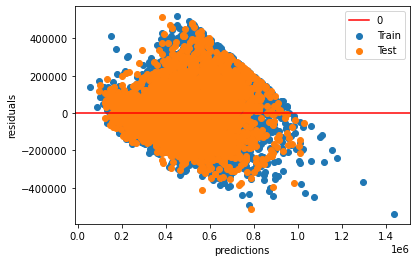

In [40]:
plt.scatter(train_preds, y_train-train_preds, label='Train')
plt.scatter(test_preds, y_test-test_preds, label='Test')

plt.axhline(y=0, color = 'red', label = '0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

## Doing it again but dropping sqft_lot casue of its p value

In [41]:
X_2 = df.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15", "id"])
y = df["price"]

all_price_2 = sm.OLS(y, sm.add_constant(X_2)).fit()

In [42]:
simple_model_summary = all_price_2.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1798.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:23   Log-Likelihood:            -1.8845e+05
No. Observations:               14359   AIC:                         3.769e+05
Df Residuals:                   14345   BIC:                         3.770e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.908e+06   2.14e+06     -1.830      0.067   -8.09e+06    2.78e+05
bedrooms        -1.7e+04   1511.703    -11.242      0.000      -2e+04    -1.4e+04
sqft_living     172.6731      2.154     80.151      0.000     168.450     176.896
sqft_lot          0.1530      0.026      5.915      0.000       0.102       0.204
floors         4.261e+04   2586.544     16.474      0.000    3.75e+04    4.77e+04
waterfront     8.454e+04      2e+04      4.229      0.000    4.54e+04    1.24e+05
view           4.224e+04   1796.040     23.519      0.000    3.87e+04    4.58e+04
condition      2.562e+04   1736.420     14.754      0.000    2.22e+04     2.9e+04
sqft_basement   -35.7596      3.311    -10.802      0.000     -42.249     -29.271
yr_built       -889.1988     49.878    -17.827      0.000    -986.966    -791.431
yr_renovated     19.6409      2.864      6.858      0.000      14.027      25.254
zipcode        -322.4740     24.293    -13.274      0.000    -370.092    -274.856
lat            6.189e+05   7622.878     81.193      0.000    6.04e+05    6.34e+05
long          -6.589e+04   9433.287     -6.985      0.000   -8.44e+04   -4.74e+04
==============================================================================
Omnibus:                      584.784   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.222
Skew:                           0.408   Prob(JB):                    2.58e-177
Kurtosis:                       3.832   Cond. No.                     2.10e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y, test_size=0.33, random_state=42)

In [44]:
lr_s_2 = sm.OLS(y_train_2, sm.add_constant(X_train_2)).fit()

In [45]:
train_preds_2 = lr_s_2.predict(sm.add_constant(X_train_2))
test_preds_2 = lr_s_2.predict(sm.add_constant(X_test_2))

In [46]:
lr_s_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     1212.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:23   Log-Likelihood:            -1.2628e+05
No. Observations:                9620   AIC:                         2.526e+05
Df Residuals:                    9606   BIC:                         2.527e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.942e+06   2.62e+06     -0.740      0.459   -7.09e+06     3.2e+06
bedrooms      -1.939e+04   1855.082    -10.450      0.000    -2.3e+04   -1.57e+04
sqft_living     175.9973      2.625     67.049      0.000     170.852     181.143
sqft_lot          0.1231      0.030      4.081      0.000       0.064       0.182
floors         3.962e+04   3161.764     12.531      0.000    3.34e+04    4.58e+04
waterfront     8.132e+04   2.43e+04      3.351      0.001    3.38e+04    1.29e+05
view           3.998e+04   2238.526     17.859      0.000    3.56e+04    4.44e+04
condition      2.648e+04   2130.697     12.427      0.000    2.23e+04    3.07e+04
sqft_basement   -36.8658      4.055     -9.091      0.000     -44.815     -28.917
yr_built       -853.6623     60.924    -14.012      0.000    -973.087    -734.237
yr_renovated     18.1637      3.483      5.215      0.000      11.337      24.991
zipcode        -343.5541     29.949    -11.471      0.000    -402.261    -284.847
lat            6.122e+05   9302.602     65.806      0.000    5.94e+05     6.3e+05
long          -6.879e+04   1.17e+04     -5.899      0.000   -9.16e+04   -4.59e+04
==============================================================================
Omnibus:                      385.825   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              529.411
Skew:                           0.407   Prob(JB):                    1.10e-115
Kurtosis:                       3.810   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
print(f"Train R2 Score: {r2_score(y_train_2, train_preds_2):.4f}")
print(f"Train MAE Score: ${mean_absolute_error(y_train_2, train_preds_2):.4f}")
print(f"Train RMSE Score: ${mean_squared_error(y_train_2, train_preds_2, squared=False):.4f}")
print("*"*20)
print(f"Test R2 Score: {r2_score(y_test_2, test_preds_2):.4f}")
print(f"Test MAE Score: ${mean_absolute_error(y_test_2, test_preds_2):.4f}")
print(f"Test RMSE Score: ${mean_squared_error(y_test_2, test_preds_2, squared=False):.4f}")

Train R2 Score: 0.6212
Train MAE Score: $93659.6176
Train RMSE Score: $121546.9614
********************
Test R2 Score: 0.6155
Test MAE Score: $92393.3500
Test RMSE Score: $120693.1610


In [48]:
lr_x3 = LinearRegression()

lr_x3.fit(X_train_2, y_train_2)

print(f"Train R2: {lr_x3.score(X_train_2, y_train_2):.4f}")
print(f"Test R2: {lr_x3.score(X_test_2, y_test_2):.4f}")

Train R2: 0.6212
Test R2: 0.6155


In [49]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_2, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [50]:
Xy_train_3 = pd.concat([X_train_3, y_train_3], axis=1)

Xy_train_3_zip = Xy_train_3.drop(columns=["zipcode", "bedrooms", "sqft_living", "waterfront", "view", "condition", "sqft_basement", "yr_built", "yr_renovated", "lat", "long", "floors"]).groupby(df["zipcode"]).mean().head(71)
Xy_train_3_zip = Xy_train_3_zip.sort_values(by=['price'],ascending=True).reset_index()
Xy_train_3_zip = Xy_train_3_zip.drop(columns=["price"])
map_zip1 = dict(dict(Xy_train_3_zip)["zipcode"])
map_zip1 = {str(y):str(x) for x,y in map_zip1.items()}

In [51]:
map_zip1

{'98002': '0',
 '98168': '1',
 '98032': '2',
 '98188': '3',
 '98023': '4',
 '98148': '5',
 '98198': '6',
 '98001': '7',
 '98003': '8',
 '98031': '9',
 '98030': '10',
 '98055': '11',
 '98178': '12',
 '98042': '13',
 '98022': '14',
 '98106': '15',
 '98092': '16',
 '98146': '17',
 '98058': '18',
 '98108': '19',
 '98038': '20',
 '98133': '21',
 '98155': '22',
 '98056': '23',
 '98118': '24',
 '98126': '25',
 '98010': '26',
 '98019': '27',
 '98166': '28',
 '98045': '29',
 '98125': '30',
 '98059': '31',
 '98028': '32',
 '98070': '33',
 '98014': '34',
 '98034': '35',
 '98011': '36',
 '98144': '37',
 '98065': '38',
 '98136': '39',
 '98024': '40',
 '98008': '41',
 '98103': '42',
 '98072': '43',
 '98117': '44',
 '98107': '45',
 '98177': '46',
 '98116': '47',
 '98122': '48',
 '98027': '49',
 '98115': '50',
 '98029': '51',
 '98007': '52',
 '98053': '53',
 '98105': '54',
 '98077': '55',
 '98052': '56',
 '98199': '57',
 '98033': '58',
 '98074': '59',
 '98109': '60',
 '98102': '61',
 '98006': '62',
 '

In [52]:
X_train_3["zipcode"] = X_train_3["zipcode"].astype(str)
X_train_3["zipcode"] = X_train_3["zipcode"].map(map_zip1)
X_train_3["zipcode"] = X_train_3["zipcode"].astype(int)

<ipython-input-52-558bb850d7a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_3["zipcode"] = X_train_3["zipcode"].astype(str)
<ipython-input-52-558bb850d7a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_3["zipcode"] = X_train_3["zipcode"].map(map_zip1)
<ipython-input-52-558bb850d7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [53]:
X_test_3["zipcode"] = X_test_3["zipcode"].astype(str)
X_test_3["zipcode"] = X_test_3["zipcode"].map(map_zip1)
X_test_3["zipcode"] = X_test_3["zipcode"].astype(int)

<ipython-input-53-330a0e7ceb7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_3["zipcode"] = X_test_3["zipcode"].astype(str)
<ipython-input-53-330a0e7ceb7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_3["zipcode"] = X_test_3["zipcode"].map(map_zip1)
<ipython-input-53-330a0e7ceb7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [54]:
X_train_3['zipcode']

16691    44
4516      4
5271      2
4888     18
9822     58
         ..
7769     21
20105    37
8071     46
1251     49
10855    42
Name: zipcode, Length: 9620, dtype: int64

In [55]:
X_train_3

,bedrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
16691,4,1850,4388,2.0,0,-2,2,0.0,1941,0.0,44,47.6885,-122.381
4516,4,2180,11132,1.0,0,-2,1,560.0,1978,0.0,4,47.3187,-122.367
5271,3,1730,7200,1.5,0,-2,1,0.0,1944,0.0,2,47.3774,-122.236
4888,3,2200,7350,1.0,0,-2,2,630.0,1988,0.0,18,47.4395,-122.161
9822,2,1650,7500,1.0,0,-2,1,650.0,1959,0.0,58,47.6871,-122.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7769,1,700,5621,1.0,0,-2,1,0.0,1945,0.0,21,47.7340,-122.353
20105,4,2880,3091,2.0,0,-2,0,940.0,2014,0.0,37,47.5711,-122.286
8071,4,1680,11123,1.0,0,-2,0,550.0,1959,0.0,46,47.7565,-122.361
1251,5,2630,10165,1.0,0,-2,1,940.0,1976,0.0,49,47.5196,-122.049


In [56]:
lr_x_4 = LinearRegression()

lr_x_4.fit(X_train_3, y_train_3)

print(f"Train R2: {lr_x_4.score(X_train_3, y_train_3):.4f}")
print(f"Test R2: {lr_x_4.score(X_test_3, y_test_3):.4f}")

Train R2: 0.7829
Test R2: 0.7767


In [57]:
all_price_4 = sm.OLS(y_train_3, sm.add_constant(X_train_3)).fit()
simple_model_summary = all_price_4.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:24   Log-Likelihood:            -1.2360e+05
No. Observations:                9620   AIC:                         2.472e+05
Df Residuals:                    9606   BIC:                         2.473e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.967e+07   1.04e+06    -28.417      0.000   -3.17e+07   -2.76e+07
bedrooms      -8762.2113   1407.843     -6.224      0.000   -1.15e+04   -6002.542
sqft_living     157.0636      1.999     78.559      0.000     153.145     160.983
sqft_lot          0.2316      0.023     10.126      0.000       0.187       0.276
floors         5183.0694   2414.656      2.147      0.032     449.835    9916.304
waterfront     6.236e+04   1.84e+04      3.395      0.001    2.64e+04    9.84e+04
view           3.483e+04   1690.794     20.599      0.000    3.15e+04    3.81e+04
condition      1.961e+04   1604.957     12.219      0.000    1.65e+04    2.28e+04
sqft_basement   -50.0261      3.070    -16.296      0.000     -56.044     -44.008
yr_built       -279.0319     45.911     -6.078      0.000    -369.028    -189.036
yr_renovated     14.3110      2.637      5.427      0.000       9.142      19.480
zipcode        6109.7596     71.089     85.945      0.000    5970.410    6249.109
lat            8.361e+04   9058.038      9.231      0.000    6.59e+04    1.01e+05
long          -2.151e+05   8273.454    -25.999      0.000   -2.31e+05   -1.99e+05
==============================================================================
Omnibus:                      643.941   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1649.595
Skew:                           0.391   Prob(JB):                         0.00
Kurtosis:                       4.872   Cond. No.                     5.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

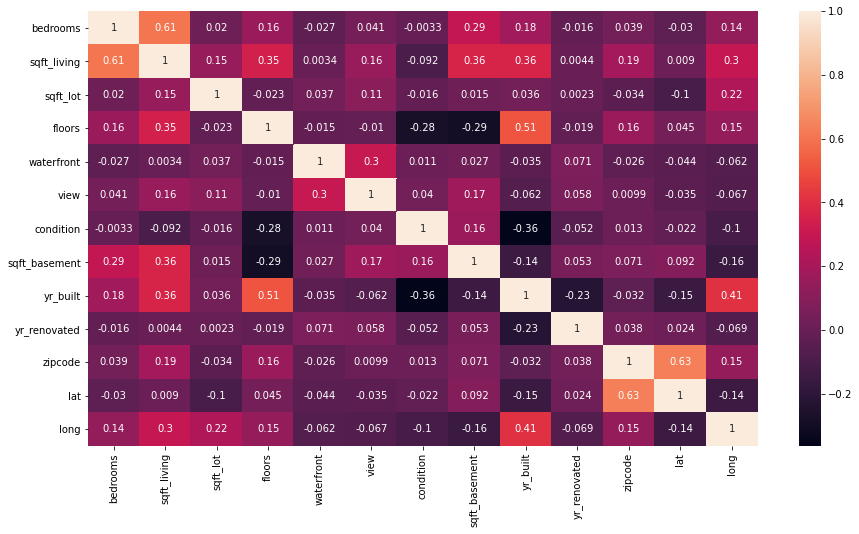

In [58]:
plt.figure(figsize = (15,8))
sns.heatmap(X_train_3.corr(), annot = True)

In [59]:
lr_x_5 = LinearRegression()

lr_x_5.fit(X_train_3, y_train_3)

print(f"Train R2: {lr_x_5.score(X_train_3, y_train_3):.4f}")
print(f"Test R2: {lr_x_5.score(X_test_3, y_test_3):.4f}")

Train R2: 0.7829
Test R2: 0.7767


In [60]:
all_price_5 = sm.OLS(y_train_3, sm.add_constant(X_train_3)).fit()
simple_model_summary = all_price_5.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:24   Log-Likelihood:            -1.2360e+05
No. Observations:                9620   AIC:                         2.472e+05
Df Residuals:                    9606   BIC:                         2.473e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.967e+07   1.04e+06    -28.417      0.000   -3.17e+07   -2.76e+07
bedrooms      -8762.2113   1407.843     -6.224      0.000   -1.15e+04   -6002.542
sqft_living     157.0636      1.999     78.559      0.000     153.145     160.983
sqft_lot          0.2316      0.023     10.126      0.000       0.187       0.276
floors         5183.0694   2414.656      2.147      0.032     449.835    9916.304
waterfront     6.236e+04   1.84e+04      3.395      0.001    2.64e+04    9.84e+04
view           3.483e+04   1690.794     20.599      0.000    3.15e+04    3.81e+04
condition      1.961e+04   1604.957     12.219      0.000    1.65e+04    2.28e+04
sqft_basement   -50.0261      3.070    -16.296      0.000     -56.044     -44.008
yr_built       -279.0319     45.911     -6.078      0.000    -369.028    -189.036
yr_renovated     14.3110      2.637      5.427      0.000       9.142      19.480
zipcode        6109.7596     71.089     85.945      0.000    5970.410    6249.109
lat            8.361e+04   9058.038      9.231      0.000    6.59e+04    1.01e+05
long          -2.151e+05   8273.454    -25.999      0.000   -2.31e+05   -1.99e+05
==============================================================================
Omnibus:                      643.941   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1649.595
Skew:                           0.391   Prob(JB):                         0.00
Kurtosis:                       4.872   Cond. No.                     5.08e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
scaler = StandardScaler()
scaler.fit(X_train_3)

X_train_sc_1 = scaler.transform(X_train_3)
X_test_sc_1 = scaler.transform(X_test_3)

In [62]:
all_price_6 = sm.OLS(y_train_3, sm.add_constant(X_train_sc_1)).fit()
simple_model_summary = all_price_6.summary()
simple_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     2665.
Date:                Wed, 29 Jun 2022   Prob (F-statistic):               0.00
Time:                        11:17:24   Log-Likelihood:            -1.2360e+05
No. Observations:                9620   AIC:                         2.472e+05
Df Residuals:                    9606   BIC:                         2.473e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.688e+05    938.791    499.348      0.000    4.67e+05    4.71e+05
x1         -7503.3174   1205.574     -6.224      0.000   -9866.497   -5140.138
x2           1.19e+05   1515.374     78.559      0.000    1.16e+05    1.22e+05
x3          9996.5822    987.177     10.126      0.000    8061.507    1.19e+04
x4          2778.1811   1294.282      2.147      0.032     241.116    5315.246
x5          3359.4080    989.490      3.395      0.001    1419.798    5299.018
x6          2.102e+04   1020.569     20.599      0.000     1.9e+04     2.3e+04
x7          1.269e+04   1038.525     12.219      0.000    1.07e+04    1.47e+04
x8         -2.003e+04   1229.255    -16.296      0.000   -2.24e+04   -1.76e+04
x9         -8150.5552   1341.071     -6.078      0.000   -1.08e+04   -5521.772
x10         5360.3671    987.680      5.427      0.000    3424.305    7296.429
x11         1.135e+05   1320.733     85.945      0.000    1.11e+05    1.16e+05
x12         1.191e+04   1290.284      9.231      0.000    9381.233    1.44e+04
x13        -3.061e+04   1177.398    -25.999      0.000   -3.29e+04   -2.83e+04
==============================================================================
Omnibus:                      643.941   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1649.595
Skew:                           0.391   Prob(JB):                         0.00
Kurtosis:                       4.872   Cond. No.                         3.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
!ls ../../../../Canvas/BSC-DS-2022/Phase2/data/kc_house_data.csv

../../../../Canvas/BSC-DS-2022/Phase2/data/kc_house_data.csv


In [64]:
df_1 = pd.read_csv('../../../../Canvas/BSC-DS-2022/Phase2/data/kc_zipcode_details.csv')

In [65]:
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,-2,0,0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,-2,2,0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,-2,0,1,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0,-2,0,0,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0,-2,0,0,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,0,-2,0,1,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0,-2,0,1,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0,-2,0,1,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0,-2,0,0,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [66]:
df_1

,ZIP Code,Neighborhood,Population
0,98001,Auburn,31911.0
1,98002,Auburn,31647.0
2,98003,Federal Way,44151.0
3,98004,Bellevue,27946.0
4,98005,Bellevue,17714.0
...,...,...,...
123,98181,Seattle,NaN
124,98185,Seattle,NaN
125,98189,Seattle,NaN
126,98190,Seattle,NaN


In [67]:
df_1['zipcode'] = df_1['ZIP Code']
df_1 = df_1.drop(columns = ['ZIP Code'])
df_1

,Neighborhood,Population,zipcode
0,Auburn,31911.0,98001
1,Auburn,31647.0,98002
2,Federal Way,44151.0,98003
3,Bellevue,27946.0,98004
4,Bellevue,17714.0,98005
...,...,...,...
123,Seattle,NaN,98181
124,Seattle,NaN,98185
125,Seattle,NaN,98189
126,Seattle,NaN,98190


In [68]:
df_1 = df_1.drop(columns = ['Population'])
df_1

,Neighborhood,zipcode
0,Auburn,98001
1,Auburn,98002
2,Federal Way,98003
3,Bellevue,98004
4,Bellevue,98005
...,...,...
123,Seattle,98181
124,Seattle,98185
125,Seattle,98189
126,Seattle,98190


In [69]:
df_m = pd.merge(df, df_1, on='zipcode', how='left')
df_m

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Neighborhood
0,6414100192,538000.0,3,2.25,2570,7242,2.0,0,-2,0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
1,2487200875,604000.0,4,3.00,1960,5000,1.0,0,-2,2,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
2,1954400510,510000.0,3,2.00,1680,8080,1.0,0,-2,0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish
3,2414600126,229500.0,3,1.00,1780,7470,1.0,0,-2,0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,Seattle
4,3793500160,323000.0,3,2.50,1890,6560,2.0,0,-2,0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,Maple Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14354,2997800021,475000.0,3,2.50,1310,1294,2.0,0,-2,0,...,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,Seattle
14355,263000018,360000.0,3,2.50,1530,1131,3.0,0,-2,0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Seattle
14356,6600060120,400000.0,4,2.50,2310,5813,2.0,0,-2,0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Seattle
14357,1523300141,402101.0,2,0.75,1020,1350,2.0,0,-2,0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Seattle


In [70]:
df_m['Neighborhood'].value_counts()

Seattle          5913
Renton           1105
Kent              884
Bellevue          772
Redmond           659
Auburn            649
Kirkland          625
Federal Way       573
Issaquah          510
Sammamish         510
Maple Valley      422
Woodinville       331
Snoqualmie        212
Kenmore           204
Enumclaw          168
North Bend        156
Bothell           135
Duvall            125
Mercer Island     106
Carnation          88
Vashon             87
Black Diamond      68
Fall City          54
Medina              3
Name: Neighborhood, dtype: int64

In [71]:
df_m.groupby('Neighborhood').mean().sort_values('price',ascending = False)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
Neighborhood,,,,,,,,,,,,,,,,,,,,
Medina,4.704767e+09,884166.666667,3.333333,1.833333,1803.333333,12053.666667,1.000000,0.000000,-2.000000,0.666667,0.666667,1253.333333,550.000000,1960.333333,0.000000,98039.000000,47.634300,-122.232667,2086.666667,11497.666667
Mercer Island,4.677917e+09,813006.981132,3.839623,2.257075,2390.716981,12475.301887,1.264151,0.000000,-1.773585,0.877358,1.188679,1924.528302,466.188679,1964.905660,150.471698,98040.000000,47.562146,-122.225113,2595.283019,11346.801887
Sammamish,5.178369e+09,677528.821569,3.713725,2.530882,2687.215686,14862.929412,1.760784,0.001961,-1.872549,0.170588,1.762745,2536.137255,151.078431,1991.296078,31.390196,98074.458824,47.607403,-122.033365,2707.645098,13379.388235
Bellevue,4.597704e+09,662003.102332,3.689119,2.169365,2241.685233,11614.172280,1.299870,0.001295,-1.806995,0.696891,0.955959,1830.621762,411.063472,1969.106218,72.608808,98006.225389,47.592420,-122.149865,2250.369171,10878.651554
Redmond,5.403718e+09,618289.647951,3.396055,2.334977,2335.012140,17986.886191,1.592564,0.000000,-1.969651,0.200303,1.072838,2163.980273,171.031866,1990.257967,33.355083,98052.408194,47.681270,-122.080407,2299.277693,15647.836115
Woodinville,3.789521e+09,578212.081571,3.513595,2.266616,2459.308157,39873.051360,1.518127,0.000000,-1.969789,0.317221,1.229607,2207.598187,251.709970,1981.903323,48.012085,98074.160121,47.749821,-122.101722,2456.193353,32925.936556
Issaquah,4.992193e+09,577364.800000,3.468627,2.468627,2319.460784,19212.905882,1.787255,0.000000,-1.925490,0.286275,1.194118,2069.490196,249.970588,1991.388235,7.845098,98027.917647,47.538747,-122.025598,2270.754902,18805.211765
Kirkland,4.108531e+09,536023.916800,3.411200,2.048000,1924.051200,9252.780800,1.343200,0.000000,-1.868800,0.454400,0.499200,1641.102400,282.948800,1975.017600,57.414400,98033.598400,47.704759,-122.197475,1953.788800,8687.150400
Snoqualmie,7.332020e+09,506972.952830,3.518868,2.522406,2487.405660,14936.033019,1.872642,0.000000,-1.768868,0.042453,0.702830,2387.830189,99.575472,1996.952830,37.367925,98065.000000,47.531698,-121.860854,2464.363208,10495.363208


In [72]:
df_m

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Neighborhood
0,6414100192,538000.0,3,2.25,2570,7242,2.0,0,-2,0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,Seattle
1,2487200875,604000.0,4,3.00,1960,5000,1.0,0,-2,2,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,Seattle
2,1954400510,510000.0,3,2.00,1680,8080,1.0,0,-2,0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,Sammamish
3,2414600126,229500.0,3,1.00,1780,7470,1.0,0,-2,0,...,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,Seattle
4,3793500160,323000.0,3,2.50,1890,6560,2.0,0,-2,0,...,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,Maple Valley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14354,2997800021,475000.0,3,2.50,1310,1294,2.0,0,-2,0,...,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265,Seattle
14355,263000018,360000.0,3,2.50,1530,1131,3.0,0,-2,0,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,Seattle
14356,6600060120,400000.0,4,2.50,2310,5813,2.0,0,-2,0,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,Seattle
14357,1523300141,402101.0,2,0.75,1020,1350,2.0,0,-2,0,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,Seattle


In [73]:
X_3 = df_m.drop(columns=["price", "grade", "sqft_above", "sqft_living15", "bathrooms", "sqft_lot15", "id",'sqft_lot'])
y_1 = df_m["price"]


In [74]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_3, y_1, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [75]:
cat_cols = ['Neighborhood']

# create an encoder object
encoder = OneHotEncoder(handle_unknown='error',
                        drop='first',
                        categories='auto')

# Create an columntransformer object
ct = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct.fit(X_train_4)
X_train_enc = ct.transform(X_train_4)
X_test_enc = ct.transform(X_test_4)

In [76]:
X_train_df = pd.DataFrame(X_train_enc, columns= ct.get_feature_names())
X_train_df.head()

,ohe__x0_Bellevue,ohe__x0_Black Diamond,ohe__x0_Bothell,ohe__x0_Carnation,ohe__x0_Duvall,ohe__x0_Enumclaw,ohe__x0_Fall City,ohe__x0_Federal Way,ohe__x0_Issaquah,ohe__x0_Kenmore,...,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,-2.0,2.0,0.0,1941.0,0.0,98117.0,47.6885,-122.381
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,-2.0,1.0,560.0,1978.0,0.0,98023.0,47.3187,-122.367
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.5,0.0,-2.0,1.0,0.0,1944.0,0.0,98032.0,47.3774,-122.236
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-2.0,2.0,630.0,1988.0,0.0,98058.0,47.4395,-122.161
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-2.0,1.0,650.0,1959.0,0.0,98033.0,47.6871,-122.207


In [77]:
lr_x_5 = LinearRegression()

lr_x_5.fit(X_train_enc, y_train_4)

print(f"Train R2: {lr_x_5.score(X_train_enc, y_train_4):.4f}")
print(f"Test R2: {lr_x_5.score(X_test_enc, y_test_4):.4f}")

Train R2: 0.7131
Test R2: 0.7024
